In [188]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

# print(tf.__version__)

In [17]:
# !pip install tensorflow
# !pip install --upgrade pip
# !pip install cv2
# pip install matplotlib


In [29]:
(x_train , y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(" X_train type   : ", type(x_train), " X_test type   : ", type(x_test))
print(" Y_train type   : ", type(y_train), "Y_test type   : ", type(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
 X_train type   :  <class 'numpy.ndarray'>  X_test type   :  <class 'numpy.ndarray'>
 Y_train type   :  <class 'numpy.ndarray'> Y_test type   :  <class 'numpy.ndarray'>


In [19]:
x_train , x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10 , activation = "softmax")
    
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train,epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0890 - accuracy: 0.9728
Epoch 2/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0755 - accuracy: 0.9771
Epoch 3/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0655 - accuracy: 0.9795
Epoch 4/100
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0590 - accuracy: 0.9817
Epoch 5/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0527 - accuracy: 0.9825
Epoch 6/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0482 - accuracy: 0.9839
Epoch 7/100
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0442 - accuracy: 0.9852
Epoch 8/100
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0411 - accuracy: 0.9864
Epoch 9/100
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0394 - accuracy: 0.9

In [59]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy : ",accuracy)
print("Loss is : ",loss)

Accuracy :  0.9816
Loss is :  39.14859577636719


In [154]:
# Save the model
model.save('mnist_model.h5')

# Show the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Load the model
new_model = tf.keras.models.load_model('mnist_model.h5')

# Show the new model architecture
# new_model.summary()

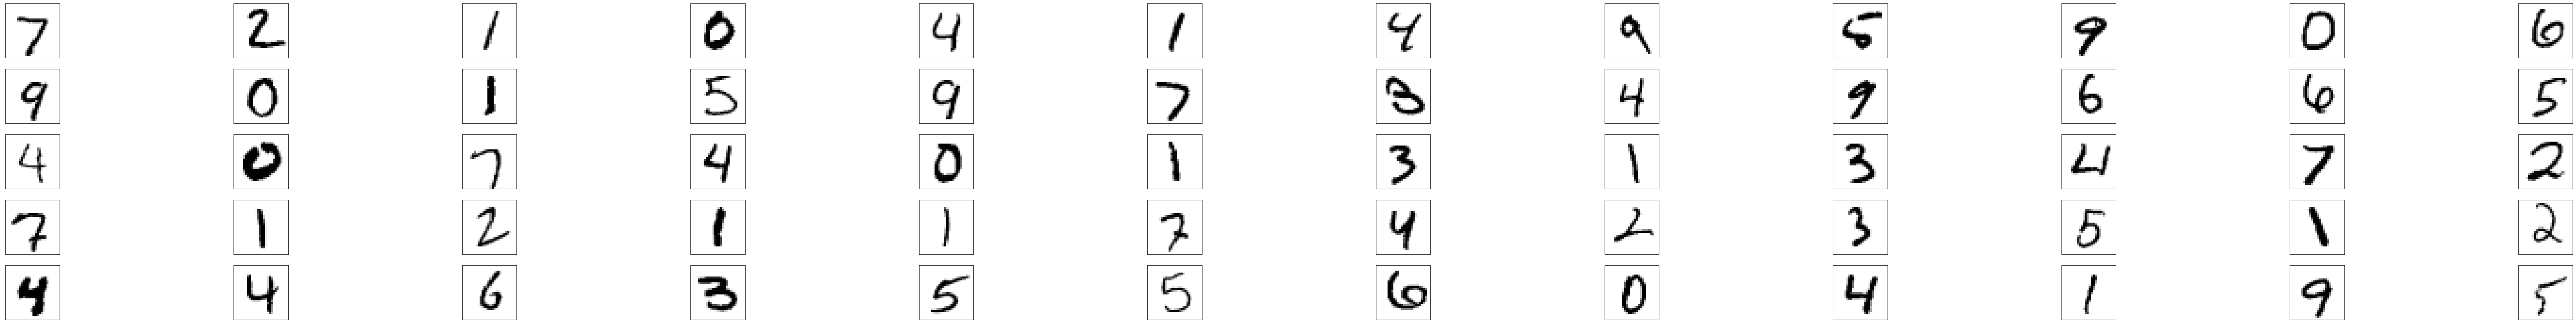

In [49]:
plt.figure(figsize=(100,12))
for i in range(60):
    plt.subplot(5,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    
plt.show()

In [155]:
print(type(x_test))
print("shape :", x_test.shape)
print(type(x_test[0]))
print(x_test[0].shape)
print(x_test[0])

<class 'numpy.ndarray'>
shape : (10000, 28, 28)
<class 'numpy.ndarray'>
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0 

In [174]:
img = cv2.imread("1.png", 0)
img_resize = cv2.resize(img, (28, 28))
img_resize.shape

(28, 28)

In [175]:
img_dim = np.expand_dims(img_resize, axis = 0)
print("img_dim sahpe : ", img_dim.shape)
single_pred = model.predict(img_dim)
print(np.argmax(single_pred))

img_dim sahpe :  (1, 28, 28)
3
